In [1]:
'''
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
'''

"\nimport ssl\n\ntry:\n    _create_unverified_https_context = ssl._create_unverified_context\nexcept AttributeError:\n    # Legacy Python that doesn't verify HTTPS certificates by default\n    pass\nelse:\n    # Handle target environment that doesn't support HTTPS verification\n    ssl._create_default_https_context = _create_unverified_https_context\n"

In [1]:
%load_ext sql

In [2]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()


In [3]:
%sql sqlite:///socioeconomic.db

In [4]:
import pandas
df = pandas.read_csv(r'C:\Users\Zulfiqar\Documents\MySQL Python\Chicago.csv') 
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

78

In [5]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [6]:
%%sql
SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [7]:
%%sql
SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


In [8]:
%%sql
SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [9]:
%%sql
SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = 98.0;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [12]:
%%sql
SELECT community_area_name, per_capita_income_ FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name,per_capita_income_
Lake View,60058
Lincoln Park,71551
Near North Side,88669
Loop,65526


 * sqlite:///socioeconomic.db
Done.


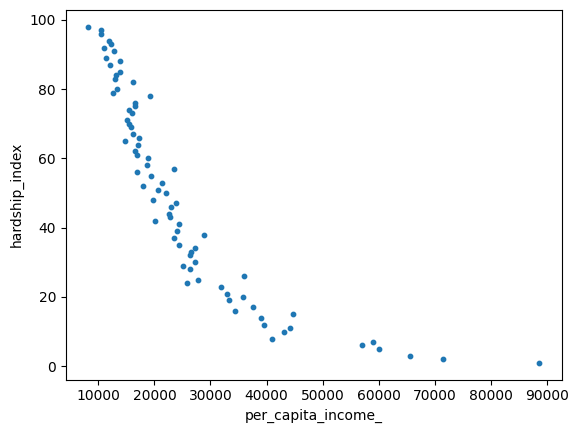

In [12]:
#My solution
import pandas as pd 
DATA = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
df = pd.DataFrame(data = DATA)
df.plot.scatter(x = 'per_capita_income_', y = 'hardship_index', s = 10); 


 * sqlite:///socioeconomic.db
Done.


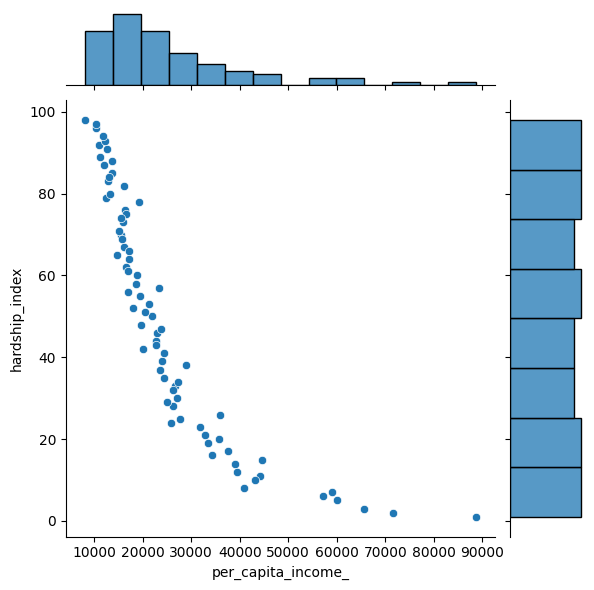

In [13]:
#Solution in Notes
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())